In [45]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')



# 데이터 불러오기

In [46]:
df = pd.read_csv('C:/ML_project_predict_heart_disease/data/heart_2020_cleaned.csv')

# 데이터 확인

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# 결측치 시각화

<AxesSubplot: >

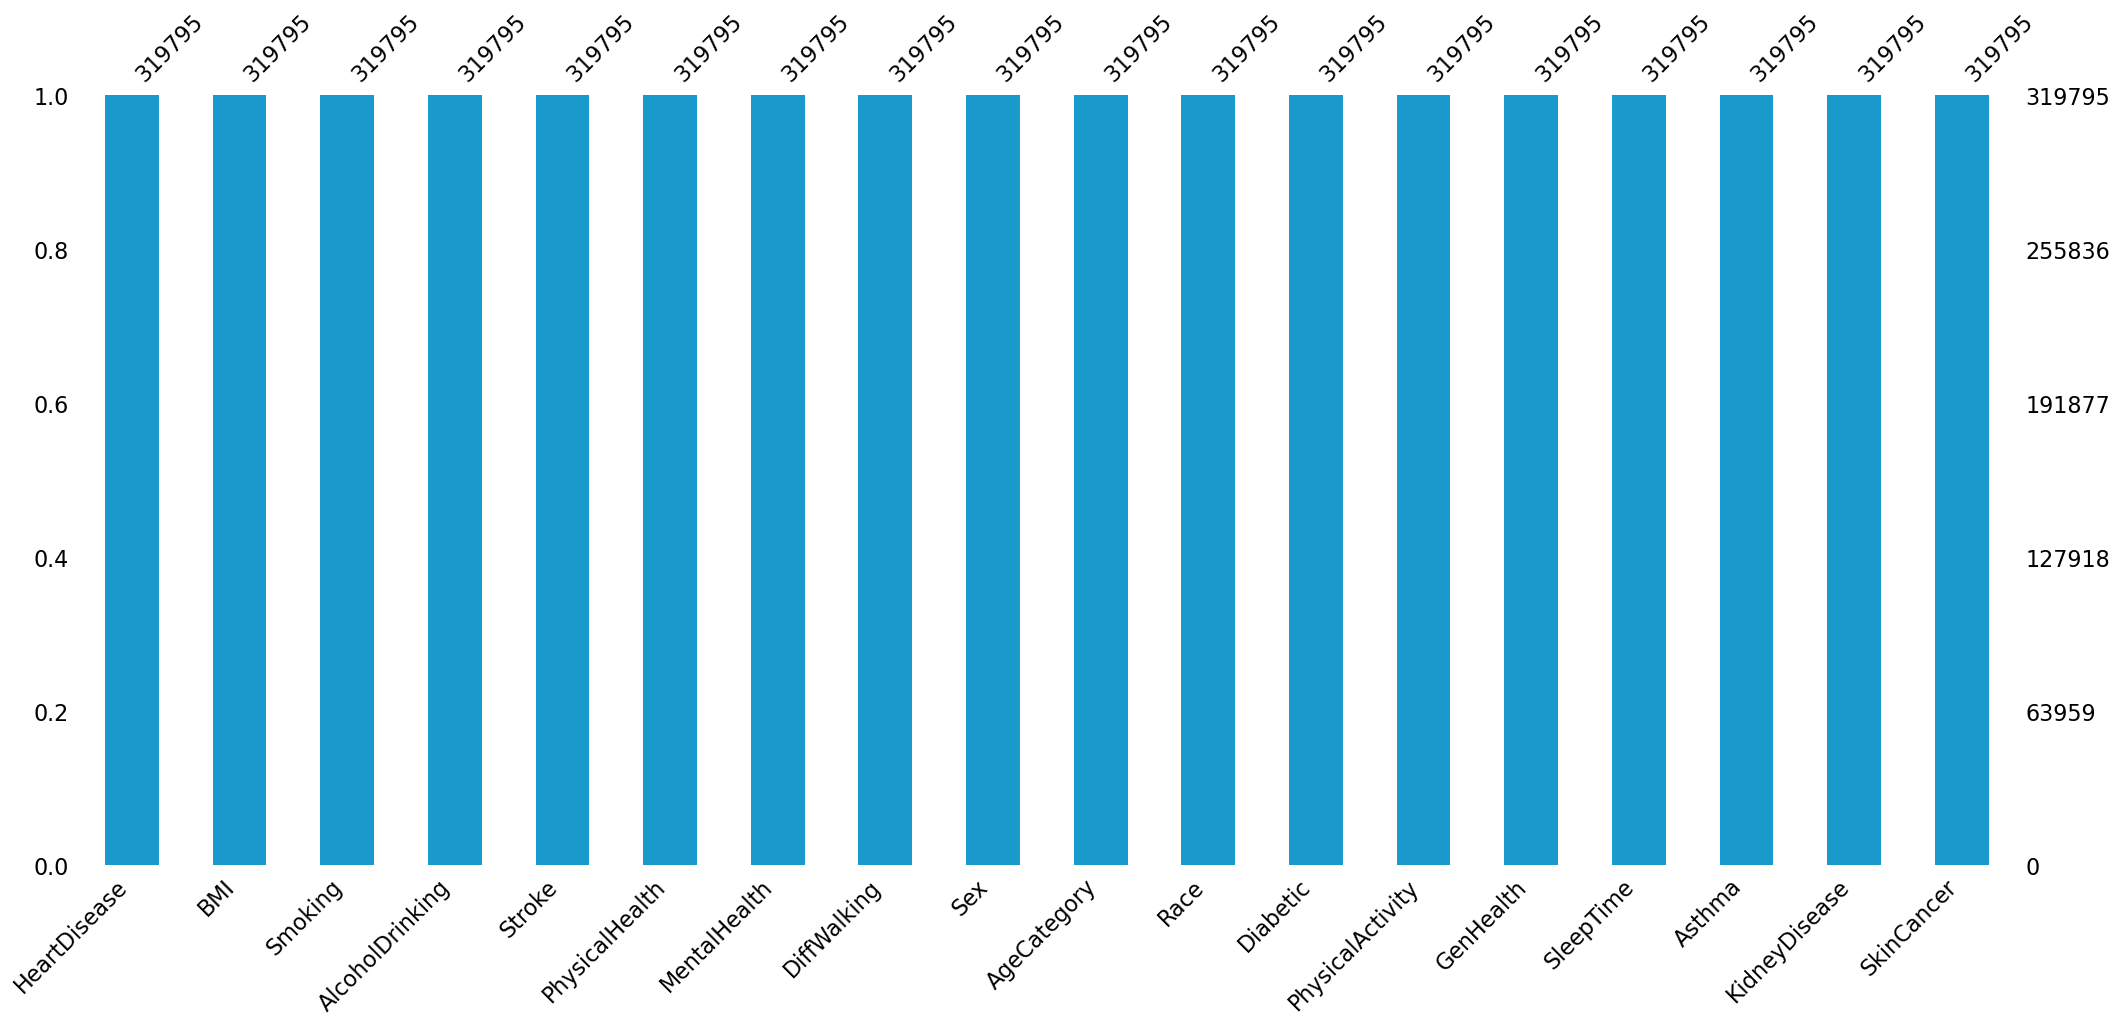

In [48]:
# 결측치 시각화
msno.bar(df, color=(0.1, 0.6, 0.8))

# 중복 제거

In [49]:
# 중복행 확인 : 18078개
print(f'중복행 개수 : {df.duplicated().sum()}')

# 중복행 제거
df = df.drop_duplicates().reset_index(drop = True)

중복행 개수 : 18078


# 연속형 변수

In [50]:
df[['BMI','PhysicalHealth','MentalHealth','SleepTime']].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


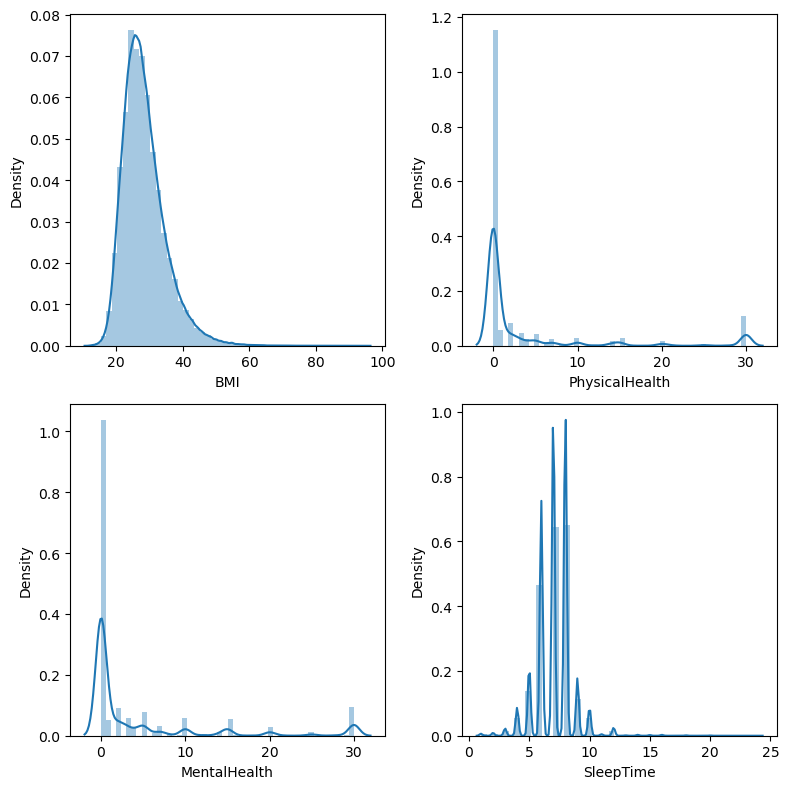

In [51]:
# 분포 그래프
import seaborn as sns
plt.figure(figsize = (8,8))

# BMI
plt.subplot(2, 2, 1) 
sns.distplot(df['BMI'])

# PhysicalHealth
plt.subplot(2, 2, 2) 
sns.distplot(df['PhysicalHealth'])

# MentalHealth
plt.subplot(2, 2, 3) 
sns.distplot(df['MentalHealth'])

# SleepTime
plt.subplot(2, 2, 4) 
sns.distplot(df['SleepTime'])

plt.tight_layout()
plt.show()

# 범주형 변수

In [52]:
def add_trace_v(fig, df, column, row_num, col_num):
    fig.add_trace(go.Pie(labels=np.array(df[column].value_counts().index),
    values=[x for x in df[column].value_counts()], hole=.35,
    textinfo='label+percent', rotation=-45, marker_colors= ['#4285f4', '#ea4335', '#fbbc05', '#34a853']),
    row=row_num, col=col_num)

In [53]:
def cat_vis(df):
       vis_col = ['HeartDisease', 'Smoking',
              'AlcoholDrinking', 'Stroke',
              'DiffWalking', 'Sex',
              'Race', 'PhysicalActivity',
              'Diabetic','GenHealth',
              'Asthma', 'KidneyDisease','SkinCancer']

       fig = make_subplots(
              rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                          "AlcoholDrinking","Stroke",
                                          "DiffWalking", "Sex",
                                          'Race', 'PhysicalActivity',
                                          'Diabetic','GenHealth',
                                          'Asthma', 'KidneyDisease',
                                          'SkinCancer'),
              specs=[[{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}]],
       )

       idx = 0
       for r in range(1,8):
              for c in range(1,3):
                     add_trace_v(fig, df, vis_col[idx], r,c)
                     if idx < 11:
                            idx += 1

       fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

       fig.show()

In [54]:
Heart_O_df = df[df['HeartDisease'] == 'Yes']
cat_vis(Heart_O_df)

In [55]:
Heart_X_df = df[df['HeartDisease'] == 'No']
cat_vis(Heart_X_df)

# 전처리

In [56]:
from sklearn.preprocessing import LabelEncoder

### 라벨 인코딩
label_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity',
                'Asthma', 'KidneyDisease', 'SkinCancer']

for feature in label_features:
    encoder = LabelEncoder()
    item = df[feature].unique()
    encoder.fit(item)
    df[feature] = encoder.transform(df[feature])

### 원핫 인코딩
onehot_features = ['AgeCategory', 'Race', 'GenHealth']
df = pd.get_dummies(df, columns= onehot_features) 
# df.to_csv('heart_2020_final.csv', index = False)

In [57]:
from model import model_selecting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

X = df.drop(columns = 'HeartDisease')
y = df['HeartDisease']

lr = LogisticRegression()
lgbm = LGBMClassifier()
xg = XGBClassifier()
ct = CatBoostClassifier()

# for clf in [lr, lgbm, xg, ct]:
#     # print(clf)
#     model = model_selecting(clf, train_test_split(X, y))
#     model.get_model_apply(SMOTE = True)

model = model_selecting(lgbm, train_test_split(X, y, random_state = 42))
model.get_model_apply(SMOTE = True)

오차 행렬
[[62559  6068]
 [ 4451  2352]]
정확도: 0.8605, 정밀도: 0.2793, 재현율: 0.3457,        F1: 0.3090, AUC:0.7954


In [58]:
df['Sex'].unique()

array([0, 1])